# train test on same datset

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
import sklearn

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

# Model
model = sklearn.linear_model.LinearRegression()

# 1. Train on full data and compute MSE
model.fit(X, y)
y_pred_full = model.predict(X)
mse_full_data = mean_squared_error(y, y_pred_full)


(mse_full_data, cv_mse_avg)


NameError: name 'cv_mse_avg' is not defined

#CV: demo to detect overfitting

In [2]:
#  Use local synthetic regression data due to fetch failure
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold # Import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Generate synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=10, noise=10, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_errors = []
val_errors = []

# Perform manual 5-fold CV to get both train and val errors
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_errors.append(train_mse)
    val_errors.append(val_mse)

# Calculate averages
avg_train_mse = np.mean(train_errors)
avg_val_mse = np.mean(val_errors)

(avg_train_mse, avg_val_mse)


(np.float64(92.49392263059967), np.float64(107.78339788289819))

The validation error is noticeably higher than the training error.

This indicates a moderate amount of overfitting — the model performs better on the data it was trained on than on unseen validation data.



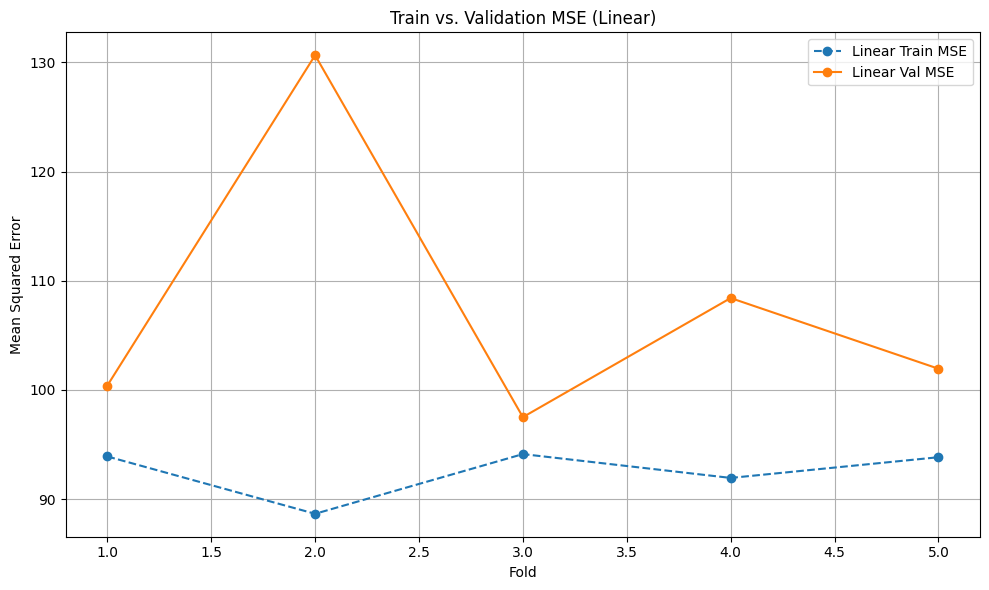

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Lists to store errors for Ridge model
train_errors = []
val_errors = []

# Perform 5-fold CV with Ridge regression
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Plotting comparison of MSE across folds
folds = np.arange(1, 6)
plt.figure(figsize=(10, 6))
#plt.plot(folds, val_errors, label='Linear Val MSE', marker='o')
plt.plot(folds, train_errors, label='Linear Train MSE', marker='o', linestyle='--')
plt.plot(folds, val_errors, label='Linear Val MSE', marker='o')


plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Train vs. Validation MSE (Linear)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
